# <center> Berlin Airbnb Analysis

<img src="../pictures/alex-galperin-Z9J2Tau44Vg-unsplash.jpg" style="width:900px;"/>

            Original Photo by Alex Galperin on Unsplash on [Unsplash](https://unsplash.com)

In [152]:
'''
We will be using several well known libraries namely pandas, numpy, matplotlib and seaborn
Documentation of each can be found on internet
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

%matplotlib inline

---
# <center>STEP 1 - Setting a stage</center>
---

In [153]:
'''We will also consider clean code methodology in this notebook, which at it's core is about
  - writing code as DRY as possible
  - Use of OOP style (i.e. Class, Function)
  - Following standard naming conventions
'''

class HelperFunctions():
    
    def _init_(self):
        pass
    
    @staticmethod
    def load_csv(file_name):
        
        """ Returns a panda dataframe with given csv file .

            Arguments:
            file_name : name of csv file 
        """
        
        default_path = '../data/berlin/'
        df = pd.read_csv(default_path + file_name)
        return df
    
    @staticmethod
    def get_features_with_missing_values(df, percentage):
        
        """ Return a list of columns with missing values more than 'percentage' % .
 
            Arguments:
            df : dataframe object for which missing values are required
            percentage : [0-100]
        """
        
        if percentage == 0:
            return list(df.columns[df.isnull().mean() == 0])
        else:
            return list(df.columns[df.isnull().mean() > percentage/100])
    
    @staticmethod   
    def draw_pie_chart(labels, sizes):
        
        """ Return plt pie chart object which can be shown inline.
 
            Arguments:
            labels : list of labels to be shown 
            sizes: list of values of each pie 
        """
    
        # Pie chart, where the slices will be ordered and plotted counter-clockwise:
        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, labels= labels, autopct= '%1.1f%%', shadow= True, startangle= 90)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        return plt
         

## Business Questions

<font color=red> 
    Q1. Average price a single person has to pay for Berlin's Airbnb apartment?
    
<font color=red> 
    Q2. Which neighborhoods have the most number of listing in Berlin?
    
<font color=red>
    Q3. What is the distribution of Apartment accomodation size in Berlin?
    
<font color=red> 
    Q4. Which type of room has the majority of listings in Berlin Airbnb?


In [154]:
'''
First, we will start with listings.csv file, which contains limited columns containing listing data.
We will not use this for our analysis but it is good idea to look into it to know important columns of dataset
'''
berlin_df_listings = HelperFunctions.load_csv('listings.csv')


In [155]:
#quick view
berlin_df_listings.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [156]:
#provides number of rows and colums in a dataframe
berlin_df_listings.shape

(22552, 16)

In [157]:
berlin_df_listings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,22552.0,1.571560e+07,8.552069e+06,2015.000000,8.065954e+06,1.686638e+07,2.258393e+07,2.986735e+07
host_id,22552.0,5.403355e+07,5.816290e+07,2217.000000,9.240002e+06,3.126711e+07,8.067518e+07,2.245081e+08
latitude,22552.0,5.250982e+01,3.082546e-02,52.345803,5.248906e+01,5.250908e+01,5.253267e+01,5.265167e+01
longitude,22552.0,1.340611e+01,5.796365e-02,13.103557,1.337541e+01,1.341678e+01,1.343926e+01,1.375764e+01
price,22552.0,6.714367e+01,2.202662e+02,0.000000,3.000000e+01,4.500000e+01,7.000000e+01,9.000000e+03
minimum_nights,22552.0,7.157059e+00,4.066507e+01,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,5.000000e+03
number_of_reviews,22552.0,1.784068e+01,3.676962e+01,0.000000,1.000000e+00,5.000000e+00,1.600000e+01,4.980000e+02
reviews_per_month,18638.0,1.135525e+00,1.507082e+00,0.010000,1.800000e-01,5.400000e-01,1.500000e+00,3.667000e+01
calculated_host_listings_count,22552.0,1.918233e+00,3.667257e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,4.500000e+01
availability_365,22552.0,7.985283e+01,1.193682e+02,0.000000,0.000000e+00,4.000000e+00,1.290000e+02,3.650000e+02


In [158]:
'''
Similarly we will use reviews.csv file which just contains two columns to have quick look.
We will not be using this file for final analysis as there is no busines question which involves reviews.
'''
berlin_df_reviews = HelperFunctions.load_csv('reviews.csv')
berlin_df_reviews.head(5)

,listing_id,date
0,2015,2016-04-11
1,2015,2016-04-15
2,2015,2016-04-26
3,2015,2016-05-10
4,2015,2016-05-14


In [159]:
berlin_df_reviews.shape

(401963, 2)

In [160]:
#Here we will use the full reviews which includes review text in comments column
berlin_df_reviews_summary = HelperFunctions.load_csv('reviews_summary.csv')


In [161]:
#Quick view
berlin_df_reviews_summary.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."


In [162]:
#number of rows and columns in a dataframe
berlin_df_reviews_summary.shape

(401963, 6)

In [163]:
#statistical summery of the dataframe
berlin_df_reviews_summary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
listing_id,401963.0,1.027382e+07,8.097068e+06,2015.0,2421223.0,9085319.0,17106359.0,29849565.0
id,401963.0,1.773751e+08,1.020965e+08,4283.0,86815658.0,179698124.0,267109374.0,346133079.0
reviewer_id,401963.0,5.915480e+07,5.634647e+07,5.0,13976062.0,38394302.0,92662359.0,224475662.0


In [164]:
'''
We will identify missing values in the reviews 
It seems that 496 reviews are missing, since it is a free text we should not provide any 
substituion for those missing values 
'''
berlin_df_reviews_summary.isna().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         496
dtype: int64

In [165]:
'''
listings_summary contain all the columns related to listings dataset
'''

berlin_df_listings_summary = HelperFunctions.load_csv('listings_summary.csv')


In [166]:
#Quick view 
berlin_df_listings_summary.head(5)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [167]:
berlin_df_listings_summary.shape

(22552, 96)

In [168]:
#Quick look at data summary for each column with describe and transpose function
berlin_df_listings_summary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,22552.0,1.571560e+07,8.552069e+06,2.015000e+03,8.065954e+06,1.686638e+07,2.258393e+07,2.986735e+07
scrape_id,22552.0,2.018111e+13,0.000000e+00,2.018111e+13,2.018111e+13,2.018111e+13,2.018111e+13,2.018111e+13
thumbnail_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,22552.0,5.403355e+07,5.816290e+07,2.217000e+03,9.240002e+06,3.126711e+07,8.067518e+07,2.245081e+08
host_acceptance_rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,22526.0,2.330685e+00,1.994782e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.676000e+03
host_total_listings_count,22526.0,2.330685e+00,1.994782e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.676000e+03
latitude,22552.0,5.250982e+01,3.082546e-02,5.234580e+01,5.248906e+01,5.250908e+01,5.253267e+01,5.265167e+01


In [169]:
#listing all the features/columns
list(berlin_df_listings_summary.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [170]:
'''
Let's find out the number of null values in each column.
Usually, columns having more than 75% values null should be dropped as it doesn't help in analysis much.
But in some case missing values (lack of values) can provide useful insight about the domain so we should consider 
carefully about removing missing values even though more than 90% is missing for some feature/column.

'''
print(berlin_df_listings_summary.isnull().sum().any())


True


In [171]:
berlin_df_listings_summary.isnull().sum().sort_values(ascending=False)

xl_picture_url                    22552
jurisdiction_names                22552
thumbnail_url                     22552
medium_url                        22552
host_acceptance_rate              22552
                                  ...  
calculated_host_listings_count        0
country_code                          0
smart_location                        0
neighbourhood_group_cleansed          0
id                                    0
Length: 96, dtype: int64

In [172]:
berlin_df_listings_summary.duplicated().sum()

0

In [173]:
#checking the number of unique values for each column
berlin_df_listings_summary.nunique().sort_values()

host_acceptance_rate        0
xl_picture_url              0
medium_url                  0
thumbnail_url               0
jurisdiction_names          0
                        ...  
picture_url             22465
listing_url             22552
longitude               22552
latitude                22552
id                      22552
Length: 96, dtype: int64

In [174]:
#Find out a set of columns with no values missing
listing_nulls_more_0 = HelperFunctions.get_features_with_missing_values(berlin_df_listings_summary, 0)
listing_nulls_more_0

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'experiences_offered',
 'picture_url',
 'host_id',
 'host_url',
 'host_verifications',
 'street',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bed_type',
 'amenities',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'requires_license',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count']

In [175]:
#Find out a set of columns with more than 75% of the values missing
listing_nulls_more_than_75 = HelperFunctions.get_features_with_missing_values(berlin_df_listings_summary, 75)
listing_nulls_more_than_75


['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'license',
 'jurisdiction_names']

In [176]:
#Find out a set of columns with more than 50% of the values missing
listing_nulls_more_than_50 = HelperFunctions.get_features_with_missing_values(berlin_df_listings_summary, 50)
listing_nulls_more_than_50

['notes',
 'access',
 'interaction',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'license',
 'jurisdiction_names']

In [177]:
#Find out a set of columns with more than 25% of the values missing
listing_nulls_more_than_25 = HelperFunctions.get_features_with_missing_values(berlin_df_listings_summary, 25)
listing_nulls_more_than_25

['space',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'license',
 'jurisdiction_names']

In [178]:
#I have selected the following columns for our analysis at the moment 
#Currently there is not particular logic to select the below columns (beside actually needed columns) but 
#if I have to extend the analysis beyond identified business question, 
#then below extra columns could be used as well

useful_columns = [
               'id', 'host_name', 'neighbourhood_cleansed',
               'zipcode', 'property_type', 'room_type',
               'accommodates', 'bathrooms', 'bedrooms',
               'beds', 'amenities', 'price', 'cleaning_fee',
               'bed_type','number_of_reviews', 'review_scores_rating',
               'instant_bookable', 'reviews_per_month', 'guests_included', 
               'extra_people']


df_listings = berlin_df_listings_summary[useful_columns]
print(df_listings.shape)
df_listings.sample(10)


(22552, 20)


,id,host_name,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,cleaning_fee,bed_type,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,guests_included,extra_people
16581,22262388,Ivana,Moabit Ost,10555,Apartment,Private room,2,1.5,1.0,1.0,"{Wifi,Kitchen,""Pets allowed"",Elevator,Heating,...",$70.00,NaN,Real Bed,1,100.0,t,0.11,1,$0.00
16728,22357451,Jeannette,Schöneberg-Nord,10783,Apartment,Private room,2,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,Kitchen,""Smoking allowed"",...",$55.00,$15.00,Real Bed,20,96.0,f,2.46,1,$15.00
5790,8248659,Alpaslan,Südliche Friedrichstadt,10963,Apartment,Private room,2,2.0,1.0,1.0,"{TV,Internet,Wifi,Kitchen,""Pets live on this p...",$45.00,$9.00,Real Bed,18,94.0,f,0.47,1,$10.00
17292,23033607,Anne,Barstraße,10713,Apartment,Private room,2,1.0,1.0,1.0,"{TV,Wifi,Heating,Washer,Dryer,Essentials,Shamp...",$40.00,$0.00,Real Bed,1,100.0,f,0.11,1,$10.00
20718,27630936,Elaine,Frankfurter Allee Nord,10247,Apartment,Private room,2,1.0,1.0,1.0,"{Wifi,Kitchen,Breakfast,Heating,Washer,Essenti...",$27.00,NaN,Real Bed,6,97.0,t,2.17,1,$0.00
8970,13519923,Margherita,Weißensee,13086,Apartment,Entire home/apt,4,1.5,2.0,3.0,"{Wifi,Kitchen,Elevator,Heating,""Family/kid fri...",$56.00,$60.00,Real Bed,1,100.0,f,0.26,1,$0.00
15393,21226203,Konstantin,Alexanderplatz,10119,Apartment,Private room,1,1.0,1.0,1.0,"{TV,Wifi,Kitchen,Heating,Washer,Essentials,""La...",$49.00,$36.00,Real Bed,2,90.0,t,0.26,1,$13.00
15288,21131194,Rüdiger,Tempelhof,12101,Townhouse,Private room,1,1.0,1.0,1.0,"{Wifi,Kitchen,Heating,""Smoke detector"",""Safety...",$35.00,$0.00,Real Bed,53,98.0,t,3.97,1,$0.00
6439,9308067,Jaroslaw,Schöneberg-Nord,NaN,Apartment,Entire home/apt,2,1.0,1.0,1.0,"{TV,Wifi,Kitchen,""Paid parking off premises"",""...",$50.00,$15.00,Real Bed,19,94.0,t,0.57,1,$0.00
7256,10508462,Asel,Wilhelmstadt,13581,Apartment,Entire home/apt,4,1.0,2.0,4.0,"{TV,Wifi,Kitchen,""Free parking on premises"",He...",$39.00,$50.00,Real Bed,2,90.0,f,0.51,1,$0.00


In [179]:
#investgating the data type for each feature
df_listings.dtypes

id                          int64
host_name                  object
neighbourhood_cleansed     object
zipcode                    object
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
amenities                  object
price                      object
cleaning_fee               object
bed_type                   object
number_of_reviews           int64
review_scores_rating      float64
instant_bookable           object
reviews_per_month         float64
guests_included             int64
extra_people               object
dtype: object

---
# <center>STEP 2 - Analysis </center>
---

In [180]:
#Distribution of listings type
berlin_accomodation_type= df_listings.groupby('room_type').count()['id']

berlin_accomodation_type

room_type
Entire home/apt    10722
Private room       11534
Shared room          296
Name: id, dtype: int64

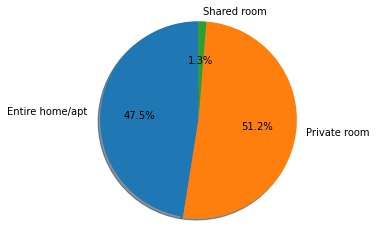

<Figure size 432x288 with 0 Axes>

In [181]:
'''
The following pie chare provides distribution of type of apartment/room available in Berlin.
'''

labels = ['Entire home/apt ', 'Private room', 'Shared room']
sizes = [10543, 11370, 283]
plt = HelperFunctions.draw_pie_chart(labels, sizes)
plt.show()
plt.savefig("room_type_pie_chart")


In [182]:
'''
The following charts shows the areas with most number of listings in Berlin
'''
number_of_listings = df_listings.groupby('neighbourhood_cleansed').count()['id'].sort_values(ascending = False)
number_of_listings

neighbourhood_cleansed
Tempelhofer Vorstadt                  1325
Frankfurter Allee Süd FK              1282
Alexanderplatz                        1091
Reuterstraße                          1002
Rixdorf                                880
                                      ... 
Haselhorst                               3
Malchow, Wartenberg und Falkenberg       3
Neu-Hohenschönhausen Süd                 2
MV 2                                     1
Hellersdorf-Ost                          1
Name: id, Length: 136, dtype: int64

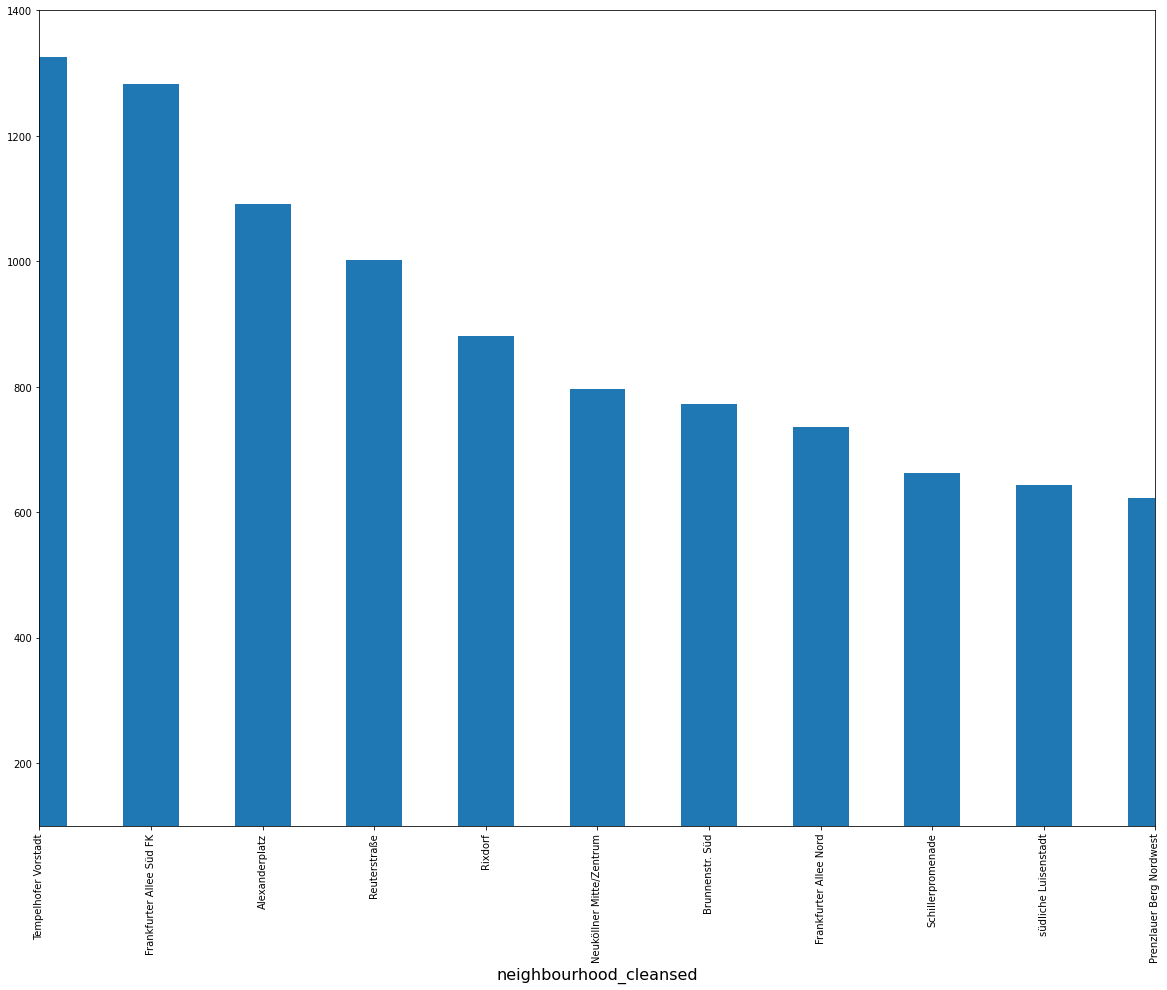

In [183]:
top_areas =number_of_listings.plot(kind="bar", figsize=(20,15))

top_areas.set_ylim([100, 1400]) # we will just used listing count >= 100
top_areas.set_xlim([0, 10]) # we are interested to know top 10 happening areas as a traveller
#plt.xaxis.label.set_size(20)

area_fig = top_areas.get_figure()
area_fig.savefig("accomodation.png")

In [184]:
#The distribution of apartment by number of person it can accomodates
accomodates_person = df_listings.groupby(['accommodates'])['id'].count()
accomodates_person




accommodates
1      2734
2     12228
3      2487
4      3216
5       701
6       733
7       131
8       151
9        36
10       57
11       15
12       24
13        2
14       11
15        6
16       20
Name: id, dtype: int64

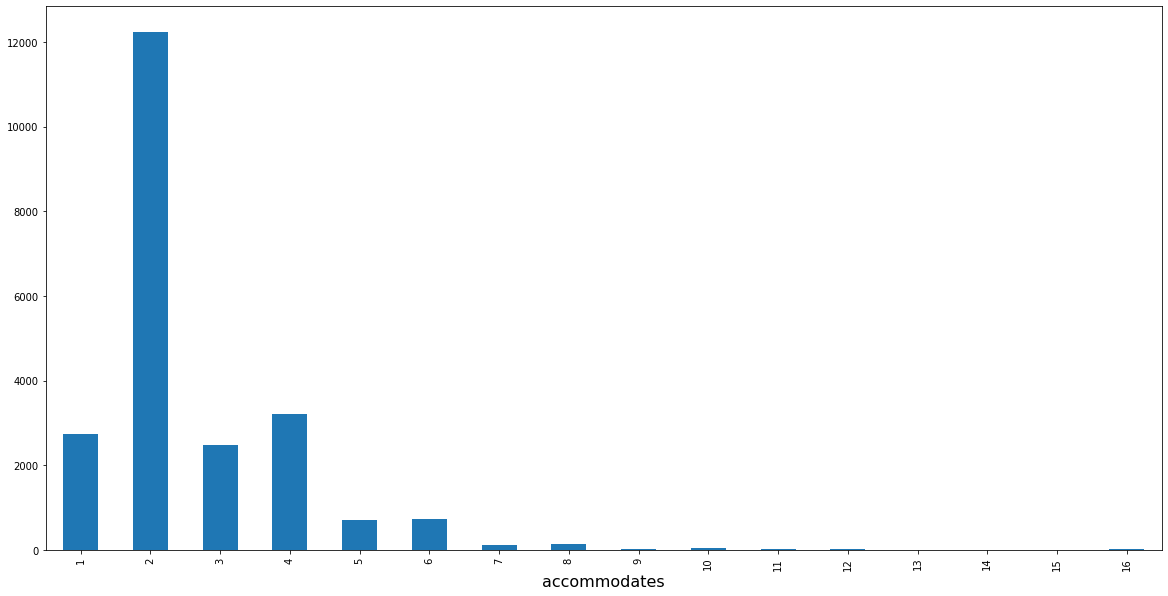

In [185]:
acc_plot = accomodates_person.plot(kind="bar", figsize=(20,10))
fig = acc_plot.get_figure()
fig.savefig("accomodation.png")

In [186]:
'''
Let's choose the following columns which helps us in getting the average price per person for accomodation.

'''
df_average_prices = df_listings[['price', 'accommodates', 'guests_included', 'extra_people','room_type']]
df_average_prices

,price,accommodates,guests_included,extra_people,room_type
0,$60.00,3,1,$28.00,Entire home/apt
1,$17.00,2,1,$0.00,Private room
2,$90.00,4,2,$20.00,Entire home/apt
3,$26.00,2,1,$18.00,Private room
4,$42.00,2,1,$24.00,Private room
...,...,...,...,...,...
22547,$60.00,2,1,$0.00,Entire home/apt
22548,$20.00,6,1,$10.00,Shared room
22549,$85.00,2,1,$0.00,Entire home/apt
22550,$99.00,2,1,$0.00,Private room


In [187]:
#check if there are any missing values in the chosen dataset 
df_average_prices.isna().sum()


price              0
accommodates       0
guests_included    0
extra_people       0
room_type          0
dtype: int64

In [188]:
#Convert the prices to numerical variable
cleaner_price = df_average_prices['price'].str.replace("$","").str.replace(',','').astype(float)

cleaner_price

0        60.0
1        17.0
2        90.0
3        26.0
4        42.0
         ... 
22547    60.0
22548    20.0
22549    85.0
22550    99.0
22551    45.0
Name: price, Length: 22552, dtype: float64

In [189]:
#Obtain the number of people that can be accommodated but are not included in the price
extra_space = (df_average_prices['accommodates'] - df_average_prices['guests_included'])
#Due to inconsistencies in the imported data this number is negative in some rare cases. We floor it to 0.
extra_space = extra_space.apply(lambda x: 0 if x<0 else x)
#Calculate the extra costs
extra_price = extra_space*df_average_prices['extra_people'].str.replace("$","").str.replace(',','').astype(float)


In [190]:
#Obtain the price at full capacity and calculate price per person per night
df_average_prices['price_pp'] = (cleaner_price + extra_price) / df_average_prices['accommodates']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [191]:
#Remove outliers using Tukey rule
IQR = df_average_prices['price_pp'].quantile(0.75) - df_average_prices['price_pp'].quantile(0.25)
lower_bound = df_average_prices['price_pp'].quantile(0.25) - 3*IQR
upper_bound = df_average_prices['price_pp'].quantile(0.75) + 3*IQR
lower_bound, upper_bound


(-25.5, 76.0)

In [192]:
#Override lower bound with a positive number 
lower_bound = 5
df_average_prices = df_average_prices[(df_average_prices['price_pp']>lower_bound) & (df_average_prices['price_pp']<upper_bound)]


In [193]:
df_average_prices.shape

(22196, 6)

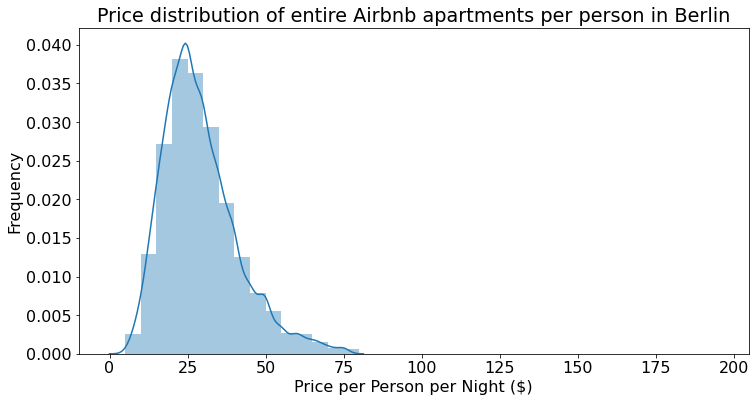

In [194]:
#Distribution of prices after removing outliers
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('axes', labelsize = 16) 
plt.rc('font', size=16)   
sns.distplot(df_average_prices['price_pp'][df_average_prices["room_type"]=='Entire home/apt'],bins = np.arange(0,200,5));
plt.xlabel('Price per Person per Night ($)');
plt.ylabel('Frequency');
plt.title('Price distribution of entire Airbnb apartments per person in Berlin');
plt.savefig('price_distribution')

In [195]:
def calculate_avg_price_per_person(target_df):
    
    '''
    Draw a price distribution chart per person based on given target_df
    This function is not extensible in the sense that it depends on having correct target_df
    The purpose of writing the fuction is to aggregate the code in one place
    '''
    
    cleaner_price = target_df['price'].str.replace("$","").str.replace(',','').astype(float)
    cleaner_extra_peope_price = target_df['extra_people'].str.replace("$","").str.replace(',','').astype(float)
    
    #Obtain the number of people that can be accommodated but are not included in the price
    extra_space = (target_df['accommodates'] - target_df['guests_included'])
    
    #Due to inconsistencies in the imported data this number is negative in some rare cases. We floor it to 0.
    extra_space = extra_space.apply(lambda x: 0 if x<0 else x)
    
    #Calculate the extra costs
    extra_price = extra_space*cleaner_extra_peope_price
    
    target_df['price_pp'] = (cleaner_price + extra_price) / target_df['accommodates']
    
    #Remove outliers using Tukey rule
    IQR = target_df['price_pp'].quantile(0.75) - target_df['price_pp'].quantile(0.25)
    lower_bound = target_df['price_pp'].quantile(0.25) - 3*IQR
    upper_bound = target_df['price_pp'].quantile(0.75) + 3*IQR
    
    if lower_bound < 5:
        lower_bound =5;
    
    target_df = target_df[(target_df['price_pp']>lower_bound) & (target_df['price_pp']<upper_bound)]
    
    #Distribution of prices after removing outliers
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.rc('axes', labelsize = 16) 
    plt.rc('font', size=16)   
    sns.distplot(target_df['price_pp'][target_df["room_type"]=='Entire home/apt'],bins = np.arange(0,200,5));
    plt.xlabel('Price per Person per Night ($)');
    plt.ylabel('Frequency');
    plt.title('Price distribution of entire Airbnb apartments per person in Berlin');
    plt.savefig('price_distribution')
    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


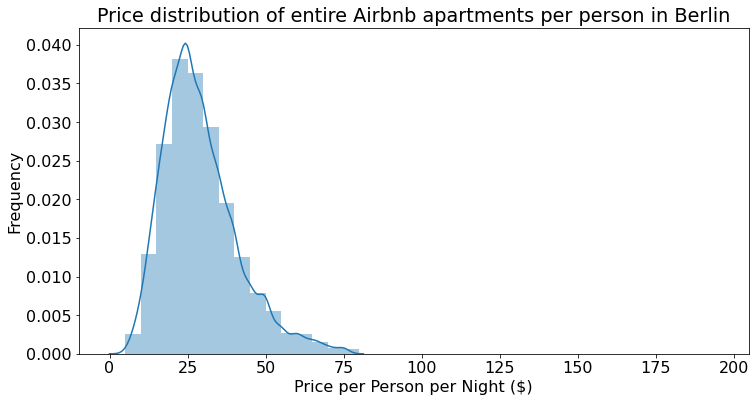

In [196]:
#Let's use the above function directly to draw the price distribution chart

target_df = df_listings[['price', 'accommodates', 'guests_included', 'extra_people','room_type']]
calculate_avg_price_per_person(target_df)

---
# <center>STEP 3 - Conclusion </center>
---


    Q1. Average price a single person has to pay for Berlin's Airbnb apartment?
      
    A1. Based on chart above, on average, person has to pay 20-40 $ in Berlin for decent accomodation 
    
    Q2. Which neighborhoods have the most number of listing in Berlin?
       
    A2. Tempelhofer Vorstadt
        Frankfurter Allee Süd FK              
        Alexanderplatz                    
        Reuterstraße                      
        Rixdorf

    Q3. What is the distribution of Apartment accomodation size in Berlin?
    
    A3. More than half of the listing accomodates 2 person. 

    Q4. Which type of room has the majority of listings in Berlin Airbnb?
        
    A4. It seems that most of the listing are equally distributed between private room and entire apartments.
        
        

In [197]:
#steps to generate html pages out of notebooks in present directory

!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook berlin_airbnb_analysis.ipynb to html',
 '[NbConvertApp] Writing 525175 bytes to berlin_airbnb_analysis.html']